# **Sprint 9 Showz analysis**

## Paso 1. Acceda los datos y prepáralos para el análisis

Almacena los datos de visitas, pedidos y gastos en variables.  Optimiza los datos para el análisis. Asegúrate de que cada columna contenga el tipo de datos correcto. 




In [ ]:
# cargar librerías
import pandas as pd 
import numpy as np
import re 
import seaborn as sns
import matplotlib.pyplot as plt


In [130]:
# importar datos
visits = pd.read_csv('https://code.s3.yandex.net/datasets/visits_log_us.csv')
print(visits.head())
print('-------')
orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_log_us.csv')
print(orders.head())
print('-------')
costs = pd.read_csv('https://code.s3.yandex.net/datasets/costs_us.csv')
print(costs.head())
print('-------')

    Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168  
-------
                Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450
-------
   source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2    

### Examinar visits

In [131]:
# Examine visits
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [132]:
visits['Device'].value_counts()

Device
desktop    262567
touch       96833
Name: count, dtype: int64

In [133]:
visits['Source Id'].value_counts()

Source Id
4     101794
3      85610
5      66905
2      47626
1      34121
9      13277
10     10025
7         36
6          6
Name: count, dtype: int64

### Limpiar visits
1. Columnas a minúsculas
2. End Ts y Start Ts a formato fecha

In [134]:
# Función para limpiar columnas
def clean_col_names(df):
    df = df.copy()
    df.columns = [
        re.sub(r'\W+', '_', col).strip('_').lower()
        for col in df.columns
    ]
    return df


In [135]:
# Limpiar visits.columns
visits = clean_col_names(visits)
visits

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


In [136]:
# Cambiar end_ts y start_ts a formato fecha
visits.end_ts = pd.to_datetime(visits['end_ts'])
visits.start_ts = pd.to_datetime(visits['start_ts'])
print(visits.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB
None


In [137]:
visits.sample(10)

,device,end_ts,source_id,start_ts,uid
122753,desktop,2018-01-24 10:37:00,5,2018-01-24 09:59:00,15555506303578935626
349913,touch,2018-04-26 19:32:00,5,2018-04-26 19:25:00,7034618162786851551
96312,desktop,2018-01-01 13:59:00,3,2018-01-01 13:50:00,12680749840413257028
241603,desktop,2017-10-06 20:13:00,4,2017-10-06 20:11:00,3134242441464600609
136771,desktop,2017-06-07 00:30:00,5,2017-06-07 00:27:00,9420187428275919394
221088,desktop,2018-02-07 01:47:00,1,2018-02-07 01:30:00,16857921118284191904
94081,desktop,2017-12-30 20:26:00,4,2017-12-30 20:17:00,1559257867348070786
309479,touch,2017-12-04 16:56:00,3,2017-12-04 16:53:00,8455762421057351255
1991,desktop,2017-07-11 14:27:00,4,2017-07-11 14:26:00,4921784934379987175
231191,desktop,2018-03-13 17:59:00,4,2018-03-13 17:58:00,9827329504924542526


### Examinar orders

In [138]:
# Examine orders
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [139]:
orders['Revenue'].describe()

count    50415.000000
mean         4.999647
std         21.818359
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: Revenue, dtype: float64

In [140]:
orders[orders.Revenue > 1000]

,Buy Ts,Revenue,Uid
23165,2017-12-10 13:04:00,1195.64,5539673724080479777
23244,2017-12-10 20:17:00,2633.28,5539673724080479777
24607,2017-12-17 18:06:00,1109.10,11149926373378902217
36522,2018-02-23 08:54:00,1236.28,11149926373378902217
36682,2018-02-24 09:25:00,1221.37,11149926373378902217
40386,2018-03-18 09:13:00,1073.11,11149926373378902217
47507,2018-05-16 19:53:00,1080.44,11149926373378902217


### Limpiar orders

1. limpiar nombres de columnas
2. 'Buy Ts' a formato fecha

In [141]:
orders = clean_col_names(orders)
orders.buy_ts = pd.to_datetime(orders.buy_ts)
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


### Examinar costs

In [142]:
# Examine costs
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [143]:
costs.sample(5)

,source_id,dt,costs
2480,10,2018-03-29,20.88
1751,5,2018-03-27,167.39
537,2,2017-11-22,126.59
2246,10,2017-08-07,7.88
1997,9,2017-11-29,18.65


In [144]:
costs.source_id.value_counts()

source_id
5     364
1     363
2     363
3     363
4     363
9     363
10    363
Name: count, dtype: int64

### Limpiar costs

1. 'dt' a formato fecha

In [145]:
costs.dt = pd.to_datetime(costs.dt)
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


## Paso 2. Haz informes y calcula métricas 

### Visitas:
- ¿Cuántas personas lo usan cada día, semana y mes?
- ¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión).
- ¿Cuál es la duración de cada sesión?
- ¿Con qué frecuencia los usuarios regresan?






In [146]:
# Primero sacaremos de las fechas, el día, la semana, mes y año de la visita
visits['day'] = visits['start_ts'].dt.weekday
visits['week'] = visits['start_ts'].dt.isocalendar().week
visits['month'] = visits['start_ts'].dt.month
visits['year'] = visits['start_ts'].dt.isocalendar().year
visits.sample(10)

,device,end_ts,source_id,start_ts,uid,day,week,month,year
83739,desktop,2017-10-20 10:18:00,3,2017-10-20 10:15:00,15301884413009246344,4,42,10,2017
68019,desktop,2018-03-22 09:22:00,3,2018-03-22 09:16:00,10850693195207782797,3,12,3,2018
64744,desktop,2017-12-11 20:15:00,2,2017-12-11 19:40:00,3706363184142281337,0,50,12,2017
335430,touch,2018-02-04 18:58:00,1,2018-02-04 18:58:00,145418137572545781,6,5,2,2018
83026,desktop,2017-12-06 21:42:00,5,2017-12-06 21:36:00,3339490918251734840,2,49,12,2017
131988,touch,2018-01-11 02:10:00,4,2018-01-11 02:08:00,7082640079949003464,3,2,1,2018
70397,desktop,2018-05-26 19:47:00,4,2018-05-26 19:23:00,195764856492905439,5,21,5,2018
136139,desktop,2018-02-01 14:50:00,4,2018-02-01 14:12:00,4492518527942812087,3,5,2,2018
115633,desktop,2018-01-30 17:09:00,2,2018-01-30 17:08:00,11059310200675305462,1,5,1,2018
345947,desktop,2017-06-29 16:10:00,3,2017-06-29 15:44:00,14166249540505058003,3,26,6,2017


In [147]:
#Promedio de visitas por día

by_days = visits.groupby(['week', 'day'])['uid'].nunique().reset_index()
print(f'Al día, en promedio, se tienen {by_days.uid.mean():,.2f} visitas.')


Al día, en promedio, se tienen 910.46 visitas.


In [148]:
#Promedio de visitas por semana

by_week = visits.groupby(['year', 'week'])['uid'].nunique().reset_index()
print(f'Por semana, en promedio, tenemos {by_week.uid.mean():,.2f} visitas')

Por semana, en promedio, tenemos 5,716.25 visitas


In [149]:
#Promedio de visitas por semana

by_month = visits.groupby(['year', 'month'])['uid'].nunique().reset_index()
print(f'Por mes, en promedio, tenemos {by_month.uid.mean():,.2f} visitas')

Por mes, en promedio, tenemos 23,228.42 visitas


In [150]:
#Promedio de sesiones por día

sessions_per_day = visits.groupby(['week', 'day'])['uid'].count().reset_index()
print(f'Al día, en promedio, se tienen {sessions_per_day.uid.mean():,.2f} sesiones.')

Al día, en promedio, se tienen 990.08 sesiones.


In [151]:
# Duración de sesiones

visits['session_duration'] = visits.end_ts - visits.start_ts
visits['session_duration_secs'] = visits.session_duration.dt.total_seconds()
avg_session_duration = visits.session_duration_secs.median()
print(f'La media de la duración de la sesión es de {avg_session_duration/60:,.2f} minutos.')

La media de la duración de la sesión es de 5.00 minutos.


In [152]:
# Con qué frecuencia los usuarios regresan? 
comeback_frec = visits.sort_values(by=['uid', 'start_ts'])
visits['time_since_last_visit'] = comeback_frec.groupby(['uid'])['start_ts'].diff()
visits['days_between_visits'] = visits.time_since_last_visit.dt.days
ave_return_time = visits.days_between_visits.median()
print(f'La media del tiempo en que suelen regresar los usuarios es de {ave_return_time:.2f} días.')


La media del tiempo en que suelen regresar los usuarios es de 4.00 días.


En la duración de la sesión y en el tiempo en que suelen regresar los usuarios usamos **la media**, ya que en el promedio los valores atípicos elevaban las cantidades.

### Ventas:
- ¿Cuándo empieza la gente a comprar? (En el análisis de KPI, generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el usuario se convierte en cliente. Por ejemplo, si el registro y la primera compra ocurren el mismo día, el usuario podría caer en la categoría Conversion 0d. Si la primera compra ocurre al día siguiente, será Conversion 1d. Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qué cohorte o canal de marketing es más efectivo.)
- ¿Cuántos pedidos hacen durante un período de tiempo dado?
- ¿Cuál es el tamaño promedio de compra?
- ¿Cuánto dinero traen? (LTV)

In [153]:
orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [154]:
# Fechas de primeras compras
purchases = orders[orders.revenue > 0]
first_purchase = purchases.groupby('uid')['buy_ts'].min().reset_index()
first_purchase.columns = ['uid', 'first_buy_ts']
orders = pd.merge(orders, first_purchase, on='uid')
#orders.sample(5)



In [155]:
# Fechas de registros
registration = orders.groupby('uid')['buy_ts'].min().reset_index()
registration.columns = ['uid', 'registration_ts']
orders = pd.merge(orders, registration, on='uid')
#orders.sample(5)

In [156]:
# Crear cohortes por días transcurridos para comprar despúes del registro
orders['days_to_purchase'] = (orders['first_buy_ts'] - orders['registration_ts']).dt.days
#orders.sample(5)

In [157]:
orders['convertion_delay'] = orders['days_to_purchase'].apply(lambda x: f'{x}d')
#orders.sample(5)

In [158]:
by_cohorts = orders.groupby('convertion_delay')['uid'].nunique()
by_cohorts

convertion_delay
0d      36504
117d        1
12d         1
167d        1
3d          1
65d         1
Name: uid, dtype: int64

Practicamente el 99% de los usuarios compran el mismo día que se registraron. 

Probablemente no sabían de la aplicación, ni les interesaba registrarse hasta que quisieron comprar boletos para un evento al que sí querían asistir.

Como este dato no nos sirve para crear cohortes relevante, agruparemos por dispositivo de usuario

In [159]:
#vamos a agrupar por devices, vamos a ver si hay más de un device por usuario

devices_per_user = visits.groupby('uid')['device'].nunique()
devices_per_user.value_counts()

device
1    220470
2      7699
Name: count, dtype: int64

In [160]:
devices_per_user = visits.groupby('uid')['device'].nunique()
devices_per_user.value_counts()

device
1    220470
2      7699
Name: count, dtype: int64

In [161]:
# añadiremos el source_id a nuestro df donde identificamos los cohortes
by_source = visits.groupby('uid')['source_id'].nunique()
orders = orders.merge(by_source, on='uid')

In [162]:
by_cohorts_source = orders.groupby('source_id')['uid'].nunique()
by_cohorts_source

source_id
1    22431
2     9346
3     3268
4     1079
5      321
6       55
7        9
Name: uid, dtype: int64

In [163]:
source_conversion = (
    orders.groupby('source_id')
    .agg({'uid':'nunique', 'revenue':'sum'})
    .rename(columns={'uid':'unique_users'})
    .sort_values(by='unique_users',ascending=False)
)

source_conversion

,unique_users,revenue
source_id,,
1,22431,98724.56
2,9346,66168.56
3,3268,30065.66
4,1079,18180.00
5,321,35459.94
6,55,2676.61
7,9,781.87


/var/folders/gz/g8hxd6y51310ny_x9n2g6x040000gp/T/ipykernel_17267/1669920340.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/gz/g8hxd6y51310ny_x9n2g6x040000gp/T/ipykernel_17267/1669920340.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


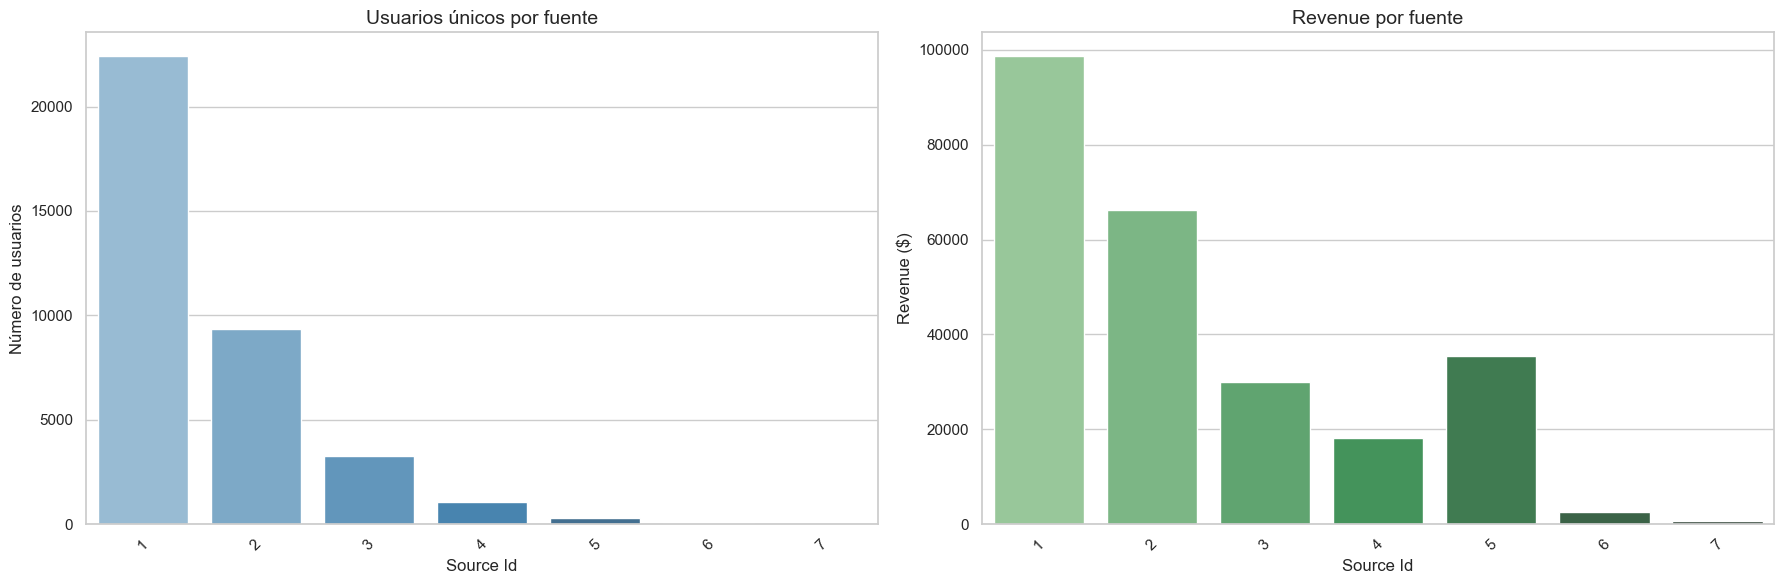

In [164]:
# Crear el canvas de Usuarios únicos y el Revenue por Source Id
sns.set(style="whitegrid")

# Crear figura y subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Primer gráfico: Usuarios únicos
sns.barplot(
    x=source_conversion.index,
    y=source_conversion['unique_users'],
    palette='Blues_d',
    ax=axes[0]
)
axes[0].set_title('Usuarios únicos por fuente', fontsize=14)
axes[0].set_xlabel('Source Id')
axes[0].set_ylabel('Número de usuarios')
axes[0].tick_params(axis='x', rotation=45)

# Segundo gráfico: Revenue
sns.barplot(
    x=source_conversion.index,
    y=source_conversion['revenue'],
    palette='Greens_d',
    ax=axes[1]
)
axes[1].set_title('Revenue por fuente', fontsize=14)
axes[1].set_xlabel('Source Id')
axes[1].set_ylabel('Revenue ($)')
axes[1].tick_params(axis='x', rotation=45)

# Ajustar espacio
plt.tight_layout()
plt.show()


In [165]:
source_conversion['revenue_per_user'] = (source_conversion.revenue / source_conversion.unique_users)
source_conversion

,unique_users,revenue,revenue_per_user
source_id,,,
1,22431,98724.56,4.401255
2,9346,66168.56,7.079880
3,3268,30065.66,9.200018
4,1079,18180.00,16.848934
5,321,35459.94,110.467103
6,55,2676.61,48.665636
7,9,781.87,86.874444


/var/folders/gz/g8hxd6y51310ny_x9n2g6x040000gp/T/ipykernel_17267/3691675975.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


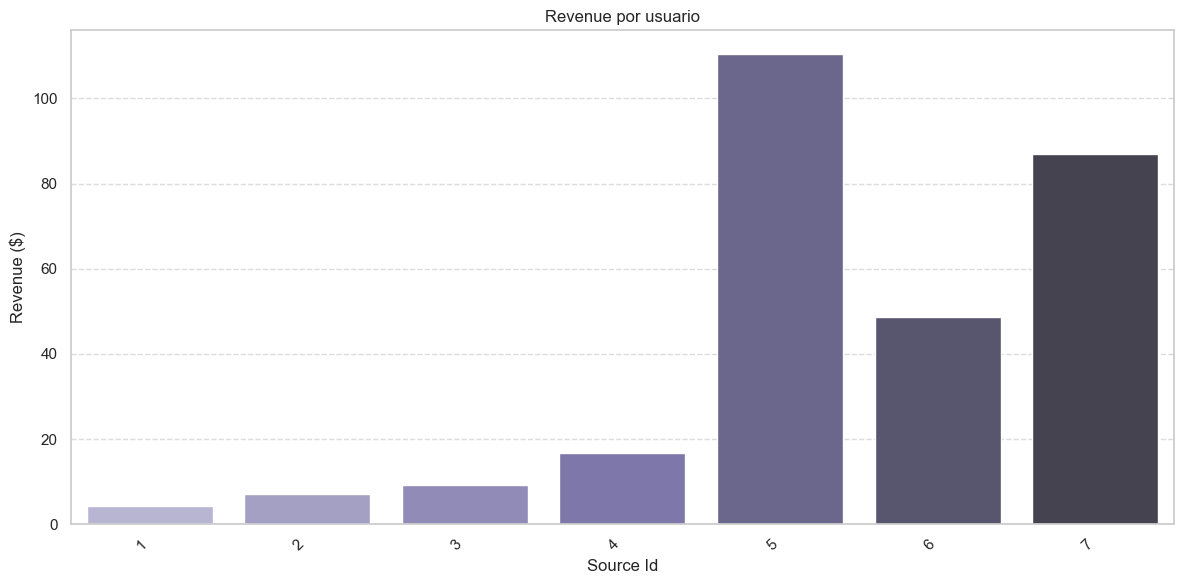

In [166]:
sns.set(style="whitegrid")

plt.figure(figsize=(12,6))

sns.barplot(
    x=source_conversion.index,
    y=source_conversion['revenue_per_user'],
    palette='Purples_d'
)

plt.xticks(rotation=45, ha='right')
plt.title('Revenue por usuario')
plt.xlabel('Source Id')
plt.ylabel('Revenue ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Los canales de Mkt que más usuarios únicos alcanzaron, también fueron los canales que más revenue generaron. Sin embargo el source Id 5 llama la atención porque aunque había pocos usuarios únicos, sus resultados de revenue fueron mucho mayores. Al llevar a cabo la gráfica descubrimos que de hecho los últimos source id's son los que más ingresos generaron por usuario. 

**La recomendación es invertir más en esos sources id's, 5, 6 y 7, para atraer más de esos usuarios que son los que más están dispuestos a gastar en la aplicación.**

In [167]:
# Cuántos pedidos se hacen en un periodo de compra? 
orders['month_buy'] = orders.buy_ts.dt.month
orders['year_buy'] = orders.buy_ts.dt.year
orders.sample(5)

,buy_ts,revenue,uid,first_buy_ts,registration_ts,days_to_purchase,convertion_delay,source_id,month_buy,year_buy
35937,2018-02-20 16:01:00,3.05,9555747354227033741,2018-02-18 19:06:00,2018-02-18 19:06:00,0,0d,1,2,2018
40783,2018-03-20 16:36:00,1.68,8780661093928539578,2018-03-20 16:36:00,2018-03-20 16:36:00,0,0d,1,3,2018
3400,2017-07-14 23:12:00,0.18,1197835022919600899,2017-07-14 23:12:00,2017-07-14 23:12:00,0,0d,1,7,2017
35303,2018-02-16 23:07:00,6.72,8965964103808045293,2018-02-16 23:07:00,2018-02-16 23:07:00,0,0d,1,2,2018
44859,2018-04-20 20:48:00,2.75,8258550509079454269,2018-04-20 20:48:00,2018-04-20 20:48:00,0,0d,2,4,2018


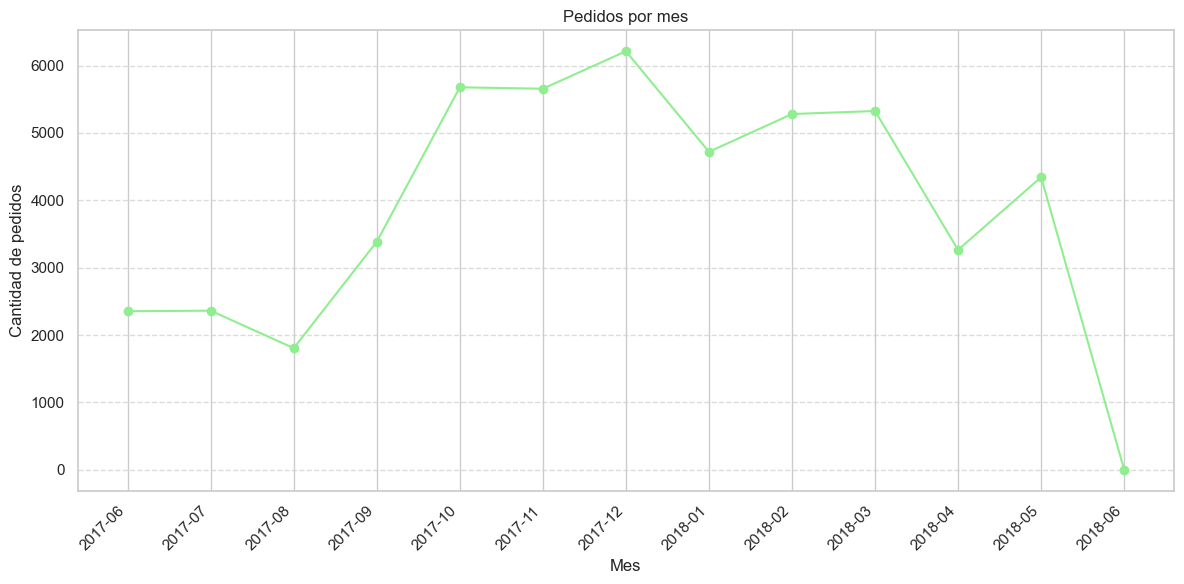

In [168]:
# Veremos cuántos pedidos se hicieron por mes 

orders_by_month = orders.groupby(['year_buy', 'month_buy'])['uid'].count().reset_index()
orders_by_month.rename(columns={'uid':'orders_count'}, inplace=True)

orders_by_month['period'] = orders_by_month['year_buy'].astype(str) + '-' + orders_by_month['month_buy'].astype(str).str.zfill(2)

plt.figure(figsize=(12,6))
plt.plot(orders_by_month['period'], orders_by_month['orders_count'], marker='o', color='lightgreen')

plt.xticks(rotation=45, ha='right')
plt.title('Pedidos por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de pedidos')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# ¿Cuál es el tamaño promedio de compra?
buy_ave = orders['revenue'].mean()
print(f'El tamaño promedio de compra es de ${buy_ave:.2f}')

El tamaño promedio de compra es de $2.50


In [ ]:
# ¿Cuánto dinero traen? (LTV)

ltv = orders.groupby('uid').revenue.sum()
ltv_ave = ltv.mean()
print(f'El life time value (LTV) es de ${ltv_ave:.2f}')

El life time value (LTV) es de $3.05


In [198]:
orders_by_uid = orders.groupby('uid').buy_ts.count().reset_index()
avg_orders_per_user = orders_by_uid.buy_ts.mean()
print(f'El promedio de órdenes por usuario es de {avg_orders_per_user:.2f} órdenes')

El promedio de órdenes por usuario es de 1.38 órdenes


## Marketing:
 1. ¿Cuánto dinero se gastó?  (Total/por fuente de adquisición/a lo largo del tiempo) 
 2. ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?
 3. ¿Cuán rentables eran las inversiones? (ROMI)
Traza gráficos para mostrar cómo difieren estas métricas para varios dispositivos y fuentes de anuncios y cómo cambian con el tiempo. 